TP1: Visión por computadora I (22Co2025)

Integrantes:

    Barniquez Piñero, Alexis Geraldine
    Paniagua, Daniel Gerardo
    Salamone Castro, Brian Adriano


# Enunciado

## Parte 1

1. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.
2. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch.

## Parte 2

1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y
visualizarlas.
2. Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas
entre si. Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección
de imágenes, considera que puede ser de utilidad tomar como ‘features’ a los histogramas?

# Resolución

## Descarga de las imágenes

In [ ]:
#imports
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [ ]:
# Funciones para descargar las imágenes del repositorio

def clone_repository(owner, repository):
    print(f"Cloning {repository}...")
    !git clone https://github.com/{owner}/{repository}.git
    os.chdir(repository)

def pull_repository(repository):
    print(f"Pulling latest changes from {repository}...")
    os.chdir(repository)
    !git pull

In [ ]:
# Descarga del repositorio en /content
os.chdir("/content")

REPO_OWNER = "FIUBA-Posgrado-Inteligencia-Artificial"
REPO_NAME = "vision_computadora_I"
TP1_DIR = "/content/vision_computadora_I/Material_TPs/TP1"
WHITE_PATCH_DIR = "/content/vision_computadora_I/Material_TPs/TP1/white_patch"

if not os.path.exists(REPO_NAME):
    clone_repository(REPO_OWNER, REPO_NAME)
else:
    pull_repository(REPO_NAME)

Cloning vision_computadora_I...
Cloning into 'vision_computadora_I'...
remote: Enumerating objects: 1268, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 1268 (delta 8), reused 5 (delta 5), pack-reused 1239 (from 5)
Receiving objects: 100% (1268/1268), 286.88 MiB | 18.95 MiB/s, done.
Resolving deltas: 100% (521/521), done.


## Parte 1

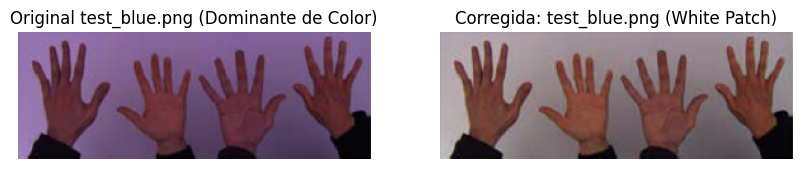

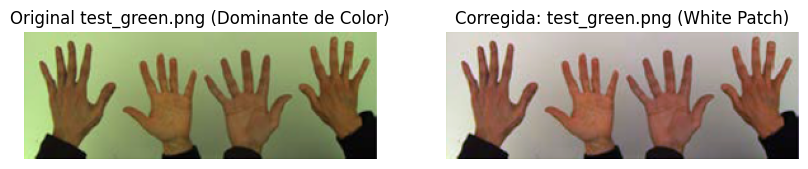

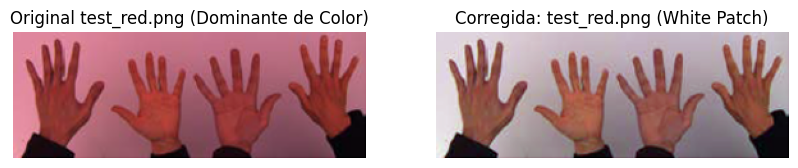

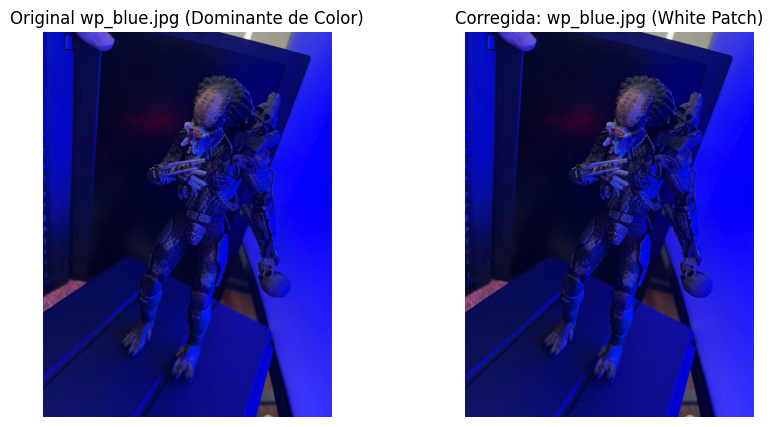

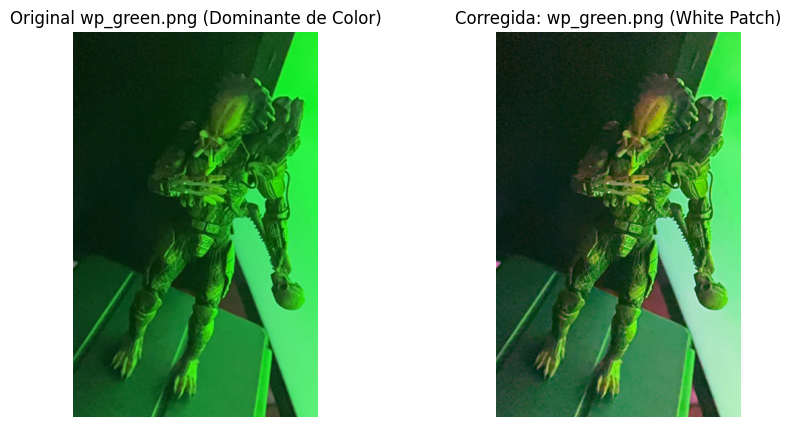

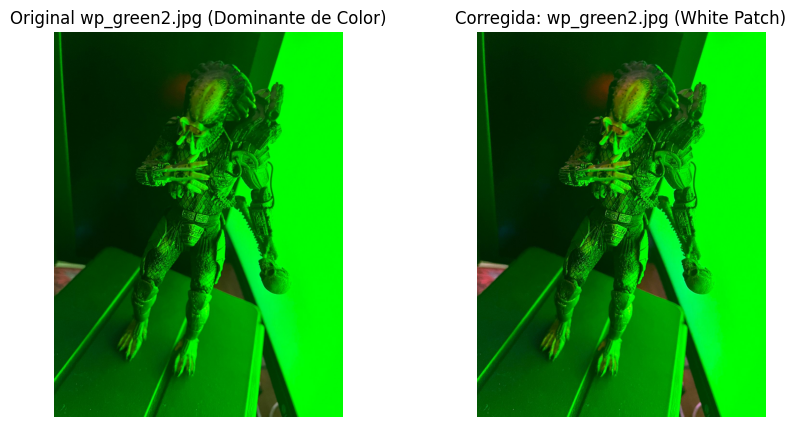

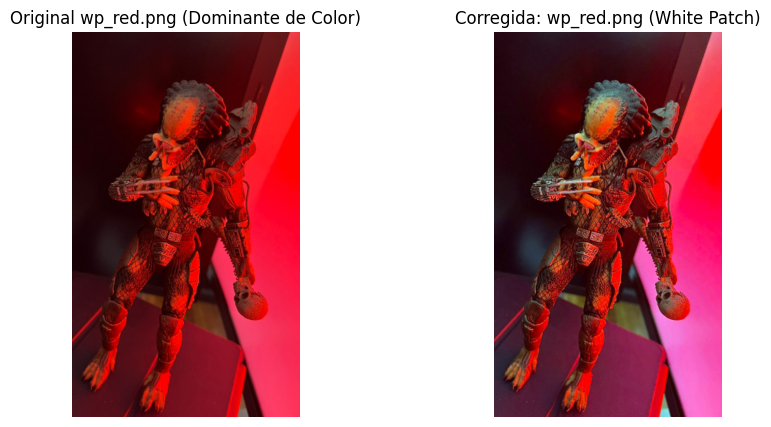

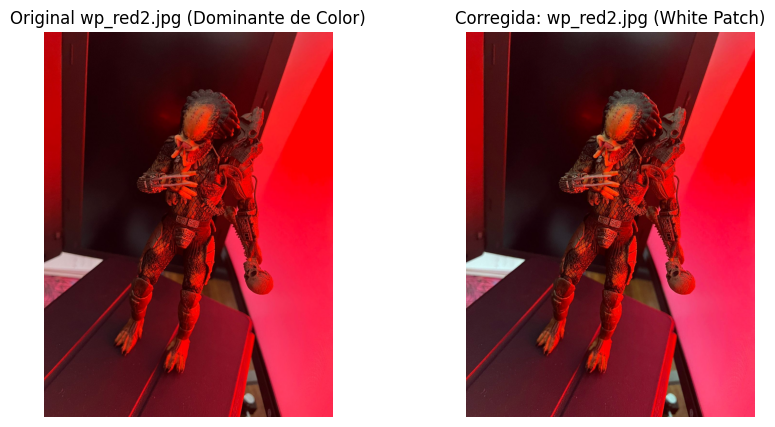

In [ ]:
# Algoritmo White Patch
def white_patch_correction(img):
    """
    Aplica el algoritmo White Patch (Máxima Energía) a una imagen BGR.

    Parámetros:
    img (np.array): La imagen de entrada en formato BGR (OpenCV).

    Retorna:
    img_corrected (np.array): La imagen con balance de blancos aplicado.
    """

    # Asegurarse de que la imagen es float para evitar desbordamiento en operaciones
    # y para facilitar la división y el escalado.
    img_float = img.astype(np.float64)

    # Separar los canales BGR (OpenCV usa BGR por defecto)
    B, G, R = cv2.split(img_float)

    # --- PASO 1: ENCONTRAR EL 'PATCHE BLANCO' (Máxima Intensidad) ---
    # Encontrar el valor máximo de intensidad en cada canal (B, G, R)
    max_b = np.max(B)
    max_g = np.max(G)
    max_r = np.max(R)

    # Crear un array con los máximos para facilitar el cálculo del factor de corrección
    max_values = np.array([max_b, max_g, max_r])

    # Encontrar la máxima intensidad entre todos los canales.
    # Este será el valor de referencia (típicamente 255 si la imagen está escalada a 0-255).
    max_total = np.max(max_values)

    # --- PASO 2: CALCULAR EL FACTOR DE ESCALADO ---
    # Los factores de escalado (ganancias) corrigen la desviación de color.
    # ganancia_i = max_total / max_i
    # Por ejemplo, si max_r es 100 y max_total es 255, la ganancia_r es 2.55.
    # Esto escala el canal R para que su píxel más brillante llegue a 255.

    gain_b = max_total / max_b
    gain_g = max_total / max_g
    gain_r = max_total / max_r

    # --- PASO 3: APLICAR LA CORRECCIÓN ---

    # Aplicar la ganancia a cada canal.
    B_corrected = B * gain_b
    G_corrected = G * gain_g
    R_corrected = R * gain_r

    # --------------------------------------------------------------------------
    # Opcional: Recortar los valores a 255 para evitar que los píxeles excedan el rango
    # después de la corrección y antes de convertir a 8-bit.
    B_corrected = np.clip(B_corrected, 0, 255)
    G_corrected = np.clip(G_corrected, 0, 255)
    R_corrected = np.clip(R_corrected, 0, 255)

    # Unir los canales de nuevo
    img_corrected = cv2.merge([B_corrected, G_corrected, R_corrected])

    # Convertir de nuevo a tipo de dato entero de 8 bits (uint8)
    return img_corrected.astype(np.uint8)

# ---  Requiere las imágenes contenidas en la carpeta white_patch ---
os.chdir(WHITE_PATCH_DIR)
images = ['test_blue.png', 'test_green.png', 'test_red.png', 'wp_blue.jpg', 'wp_green.png',
          'wp_green2.jpg', 'wp_red.png', 'wp_red2.jpg']

# Carga de la imagen
for i in images:
  try:
      # Nota: cv2.imread carga la imagen en formato BGR (Azul, Verde, Rojo)
      image_bgr = cv2.imread(i)
      if image_bgr is None:
        raise FileNotFoundError("Asegúrate de cargar las imágenes en el directorio.")

      # Aplicar el algoritmo
      image_corrected_bgr = white_patch_correction(image_bgr)

      # Mostrar la imagen (Convertir de BGR a RGB para mostrar con matplotlib)
      image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
      image_corrected_rgb = cv2.cvtColor(image_corrected_bgr, cv2.COLOR_BGR2RGB)

      plt.figure(figsize=(10, 5))

      plt.subplot(1, 2, 1)
      plt.imshow(image_rgb)
      plt.title(f'Original {i} (Dominante de Color)')
      plt.axis('off')

      plt.subplot(1, 2, 2)
      plt.imshow(image_corrected_rgb)
      plt.title(f'Corregida: {i} (White Patch)')
      plt.axis('off')

      plt.show()

  except FileNotFoundError as e:
      print(f"Error: {e}")
      print("El código funciona, pero necesitas subir la imagen a los archivos del notebook.")

Aunque es simple y rápido, el algoritmo White Patch asume que realmente existe un píxel blanco o gris muy brillante en la escena. Si la escena está compuesta solo por colores oscuros, o si el objeto más brillante es un color saturado (ej., una luz roja muy intensa), el algoritmo escalará ese color a blanco puro, introduciendo una distorsión de color.

## Parte 2

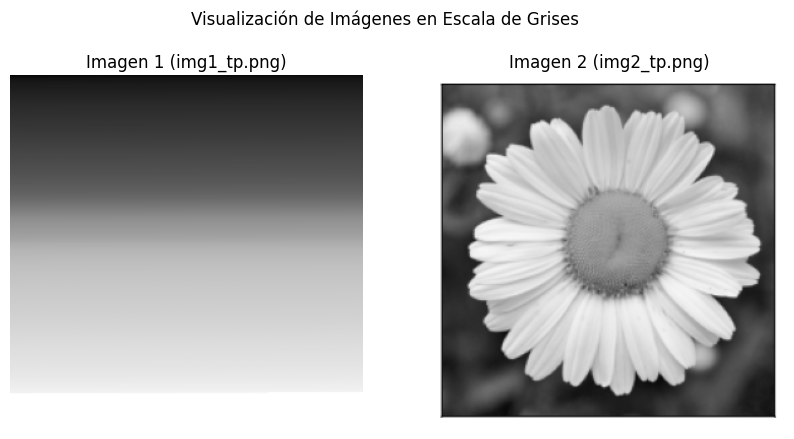

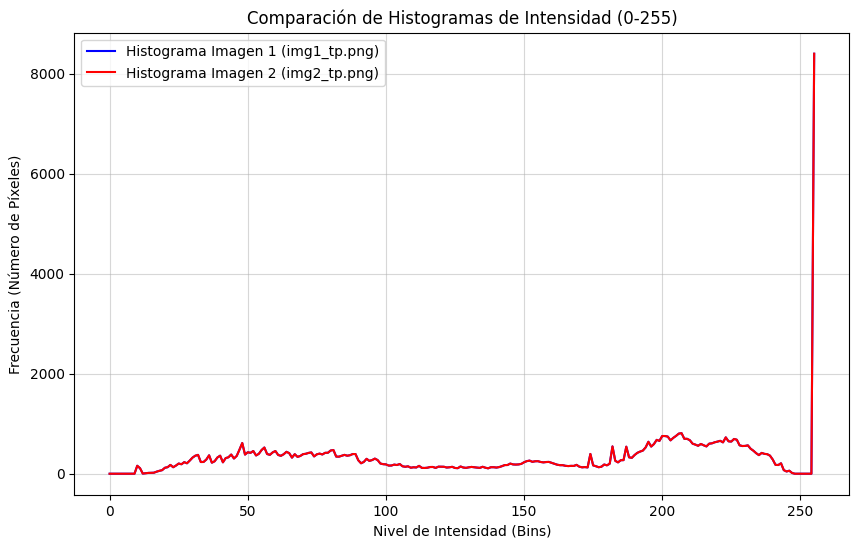

In [ ]:
# --- CONFIGURACIÓN ---
os.chdir(TP1_DIR)
IMG1_PATH = 'img1_tp.png'
IMG2_PATH = 'img2_tp.png'
N_BINS = 256 # Número de bins para un histograma de 8 bits (0-255)


def analyze_images():
    # --- 1. Carga de imágenes en escala de grises ---
    # Usamos cv2.IMREAD_GRAYSCALE (o 0) para leer directamente en escala de grises
    img1 = cv2.imread(IMG1_PATH, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(IMG2_PATH, cv2.IMREAD_GRAYSCALE)

    if img1 is None or img2 is None:
        raise FileNotFoundError(f"No se pudieron cargar una o ambas imágenes: {IMG1_PATH}, {IMG2_PATH}")


    # --- 2. Visualización de Imágenes ---
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img1, cmap='gray')
    plt.title(f'Imagen 1 ({IMG1_PATH})')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img2, cmap='gray')
    plt.title(f'Imagen 2 ({IMG2_PATH})')
    plt.axis('off')

    plt.suptitle("Visualización de Imágenes en Escala de Grises")
    plt.show()

    # --- 3. Cálculo y Gráfico de Histogramas ---

    # Calcular histograma de img1 usando NumPy
    hist1, bins1 = np.histogram(img1.ravel(), N_BINS, [0, 256])

    # Calcular histograma de img2 usando NumPy
    hist2, bins2 = np.histogram(img2.ravel(), N_BINS, [0, 256])

    # Graficar Histograma
    plt.figure(figsize=(10, 6))
    plt.plot(hist1, color='blue', label=f'Histograma Imagen 1 ({IMG1_PATH})')
    plt.plot(hist2, color='red', label=f'Histograma Imagen 2 ({IMG2_PATH})')

    plt.title('Comparación de Histogramas de Intensidad (0-255)')
    plt.xlabel('Nivel de Intensidad (Bins)')
    plt.ylabel('Frecuencia (Número de Píxeles)')
    plt.legend()
    plt.grid(True, alpha=0.5)
    plt.show()

# Ejecutar el análisis
analyze_images()

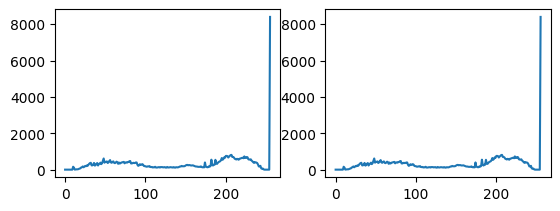

In [ ]:
# Otra visualización, para confirmar que son iguales y que no hay ningún error.
fig = plt.figure()

img1 = cv2.imread(IMG1_PATH, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(IMG2_PATH, cv2.IMREAD_GRAYSCALE)

hist1,bins1 = np.histogram(img1.ravel(),256,[0,256])
ax1=plt.subplot(221)
ax1.plot(hist1)

hist2,bins2 = np.histogram(img2.ravel(),256,[0,256])
ax2=plt.subplot(222)
ax2.plot(hist2)

plt.show()

### A. Comparación entre Histogramas:

Los histogramas de ambas imágenes son iguales. En principio, esto puede resultar llamativo porque las imágenes son muy distintas, pero recordando la forma en que se construyen es totalmente posible.

A continuación, mencionamos las principales fuciones de un histograma. Realizar una comparación, puede ser útil para revelar las diferencias en la distribución de brillo y contraste:
1. **Brillo (distribución de intensidades):** si el pico del histograma está cargado a la izquierda (cerca de 0), la imagen es oscura. Si está a la derecha (cerca de 255), es brillante. Si el pico de un histograma está más a la derecha que el otro, es probable que esa imagen sea percibida como más brillante.
2. **Contraste y rango dinámico:** si los bins del histograma cubren un rango amplio de 0 a 255 (distribución 'ancha'), la imagen tiene un alto contraste. Si los bins están concentrados en un rango estrecho ('estrecha' o picuda), la imagen tiene bajo contraste (Ejemplo: imagen cubierta por neblina).
3. **Modo y uniformidad:** las imágenes con dominancia de colores claros y oscuros (ej., un rostro sobre un fondo negro) suelen tener histogramas bimodales (dos picos).

### B. Utilidad del Histograma como Feature para Clasificación/Detección:

Sí, pero con importantes limitaciones.

Justificación:
   - **Utilidad (clasificación basada en contenido global):**
     Los histogramas son excelentes para capturar 'features' de **contenido global**, como el color o la textura general. Por ejemplo, son muy útiles para distinguir entre categorías amplias (ej., 'imágenes de día' vs. 'imágenes de noche', 'imágenes de bosques' vs. 'imágenes de desiertos'). Son la base de algoritmos clásicos como 'Histograma de Color' para recuperación de imágenes (CBIR).
   - **Limitaciones (detección y clasificación basada en forma/localización):**
     Dos imágenes totalmente distintas pueden tener el mismo histograma. Además son invariantes a la traslación, rotación y escala (no importa dónde esté el objeto, el histograma será el mismo). Esto significa que pierden toda la información espacial. No pueden distinguir si un objeto está a la izquierda o a la derecha, ni pueden diferenciar entre un gato y una casa si tienen una distribución de intensidad similar.
   - **Conclusión:** Para tareas de detección de objetos (que requieren localización) o clasificación que dependa de la forma del objeto, los histogramas por sí solos son insuficientes.